<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<h1 style="text-align: center;">Ürün Yorum Analizi Projesi</h1>


<p>Bu proje, bir e-ticaret sitesinden alınan ürün yorumlarını inceleyerek, yorumların olumlu mu yoksa olumsuz mu olduğunu belirlemek için bir yapay zeka modeli kullanmaktadır.</p>
        <h2>Kullanılan Teknolojiler ve Kütüphaneler:</h2>
        <ul>
            <li>Python</li>
            <li>Pandas</li>
            <li>NumPy</li>
            <li>Seaborn</li>
            <li>Matplotlib</li>
            <li>Requests</li>
            <li>JSON</li>
            <li>TensorFlow Keras (Sequential, Dense, GRU, Embedding)</li>
            <li>Tokenizer ve pad_sequences</li>
        </ul>
        <h2>Projenin amacı : </h2>
        <p>Projede amaç, web scraping ile alınan ürün yorumlarını analiz ederek, her bir yorumun olumlu mu yoksa olumsuz mu olduğunu belirlemektir. Bu amaç doğrultusunda, doğal dil işleme (NLP) teknikleri ve derin öğrenme modelleri kullanılmaktadır.</p>
    </div>
</body>
</html>

<h3>geliştiren  : Hüseyin Erol</h3>

Kişisel websitem : https://huseyineroll.com/

Github : https://github.com/HuseyinErol24

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import requests 
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Veri Çekme İşlemi

In [2]:
for i in range(1,3):
    url = f"https://user-content-gw-hermes.hepsiburada.com/queryapi/v2/ApprovedUserContents?sku=HBV00000NBN6Z&from={i}&size=10&includeSiblingVariantContents=true&selectedStars=5&includeSummary=true"
    veri = requests.get(url).content
    veri = json.loads(veri)
    for i in veri["data"]["approvedUserContent"]["approvedUserContentList"]:
        print("Yorum => :",i["review"]["content"],"\n")

Yorum => : Logitech m170i iade edip bunu aldım. Çünkü kablolu mousedan sonra o çok küçük geldi. büyük sevenlere gelsin :) kumpasla ölçtüm sizin için daha ne yapayım... 

Yorum => : Hafif kullanışlı. Tam istediğim gibi. Tavsiye edilir. 

Yorum => : Ürün fiyatina gore harika,Kucuk boy istemiyordum,boyuda gayet iyi.Tavsiye ediyorum 

Yorum => : Lenovo… Kalite ve Markanın bir arada olması logitech mouse kullanıyorum aynı zamanda her ikiside çok iyi. Boyut olarak Logitech M171 den biraz büyük ama Razer DeathHadder V2 mini ile aynı boyutta. Tavsiye edilir. 

Yorum => : Ürün kısa sürede elime ulaştı. Hafif ve kullanışlı bi ürün. Büyüklüğü gayet iyi. Kaliteli bi ürün. Üründen çok memnun kaldım. 

Yorum => : verdiğin parayı fazlasıyla hakediyor, bilinmeyen markalara kesinlikle para vermeyin ürün tam elinize göre Marka belli kalite belli. 

Yorum => : beklediğimden daha iyi çıktı tahmin etmezdim bu denli iyi olacağını.tuş tıklama sesi,pil kapağının çaılıp kapanmasının pratikliği,malzeme kalitesi

<p style="color:red">Bu şekilde istediğimiz siteden istediğimiz kadar yorumu bir araya getirebiliriz. Ne kadar çok veri kullanırsak, model o kadar doğru sonuçlar verecektir. Ben örnek olması adına bu adımı kısa tuttum.</p>

In [3]:
veri = pd.read_csv("yorumlar.csv")

In [4]:
veri.head() #1 degerleri 4-5 yıldızlı yorumlar  0 degerleri 1-2 yıldızlı yorumlar 
#veri çekme aşamasında link üzerindeki stars kısmından bunu ayaralaya bilirsiniz

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


<Axes: title={'center': 'Olumlu olumsuz yorum dağılımları'}, xlabel='Rating', ylabel='count'>

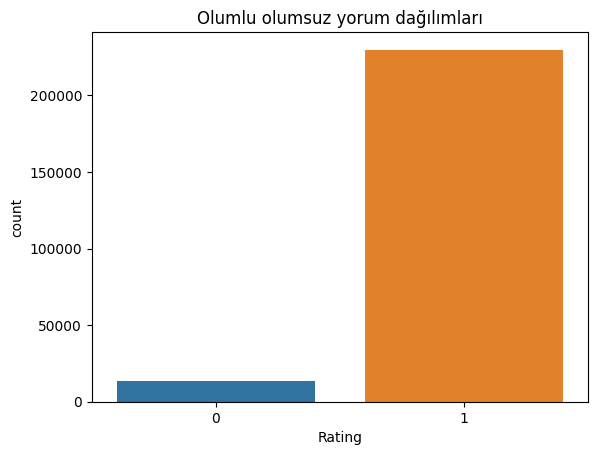

In [5]:
plt.title("Olumlu olumsuz yorum dağılımları")
sbn.countplot(data = veri,x="Rating")

In [6]:
y_degeri = veri["Rating"].values.tolist()
x_degerleri = veri["Review"].values.tolist()

In [7]:
veri.info()
#243497 adet yorum mevcut csv formatında

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


# Veri Setini Ayırma

In [8]:
y_degeri[30] #olumlu yorum değeri

1

In [9]:
x_degerleri[30] #o degere denk gelen yorum

'Logitech her zamanki gibi kaliteli.'

In [10]:
#veri setinin %80 test olarak ayırıcam bundan dolayı

In [11]:
sayi = int(len(veri)*0.8)

In [12]:
sayi # veri setinin %80 ni 194797 denk geliyor

194797

In [13]:
x_train = x_degerleri[0:sayi]
y_train = y_degeri[0:sayi]
x_test  = x_degerleri[sayi:]
y_test  = y_degeri[sayi:]

In [14]:
print("X_train : ",len(x_train))
print("Y_train : ",len(y_train))
print("X_Test  : ",len(x_test))
print("Y_test  : ",len(y_test))

X_train :  194797
Y_train :  194797
X_Test  :  48700
Y_test  :  48700


# Tokenleştirme

In [15]:
kelime_sıklıgı = 10000
#en cok sık kullanılan 10K kelime ile işleme devam ediyoruz

In [16]:
tokenizer = Tokenizer(num_words=kelime_sıklıgı)

In [17]:
tokenizer.fit_on_texts(x_degerleri)

In [18]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [19]:
x_train_token = tokenizer.texts_to_sequences(x_train)

In [20]:
x_train_token[120] #tokenleştirilmiş yorum

[4, 221, 779, 30, 5155, 191, 14, 79]

In [21]:
x_train[120] #tokenleştirilmeden önceki hal

'Ürün şu ana kadar hatasız çalışıyor. Gayet başarılı.'

In [22]:
x_test_token = tokenizer.texts_to_sequences(x_test)

In [23]:
x_test_token[800]

[3226,
 308,
 2,
 4699,
 260,
 693,
 185,
 1556,
 1810,
 185,
 64,
 3379,
 20,
 78,
 30,
 13,
 269,
 2,
 550,
 50]

In [24]:
x_test[800]

'Çıkış musluğu herhangi bir darbe veya zorlanma görmediği halde su damlatıyor, açma kapama vanasının buunduğu alandan su damlatıyor. Ayrıca denildiği gibi o kadar da sessiz bir motor değil.'

# Boyut Belirleme işlemi

In [25]:
max_token_uzunluk = 50

In [26]:
x_train_pad = pad_sequences(x_train_token,max_token_uzunluk)
x_test_pad = pad_sequences(x_test_token,max_token_uzunluk)

In [27]:
x_train_pad[45] #bütün yorumları aynı boyuta getirmek için bu adımı gerçekleştiriyoruz 

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    5,   30, 4261,
          3, 5494,    1,    7,    2,  587])

In [28]:
x_train_token[45] 

[5, 30, 4261, 3, 5494, 1, 7, 2, 587]

In [29]:
key_value = tokenizer.word_index 
ters_cevir =dict(zip(key_value.values(),key_value.keys()))
# key-value yapısını yer değiştiriyoruz yani sayı karşılıgına kelime gelecek şekilde 
#düzenliyoruz

In [30]:
def vektor_cevir(vektor):
    text = ""
    for i in vektor:    
        if i == 0:
            text +="" #0 degeri gelirse ekleme yapmıyoruz
        else:
            text +=" "+ters_cevir[i] #0 dan farklı sayı gelirse onun karşılıgındaki kelimeyei ekliyoruz
    return text.strip()

In [31]:
vektor_cevir(x_train_pad[45]) #tokenleşimiş veri verdik ve o bize normal bir çıktı verdi

'bu kadar yorumlarını ve puanı çok güzel bir mouse'

In [32]:
model = Sequential()

In [33]:
embeding_size = 50 #token boyutuna eşit 

In [34]:
model.add(Embedding(input_dim=kelime_sıklıgı,
                   output_dim=embeding_size,
                   input_length=embeding_size,))

In [35]:
model.add(GRU(units=16,return_sequences=True))
model.add(GRU(units=8,return_sequences=True))
model.add(GRU(units=4))
model.add(Dense(1,activation="sigmoid"))
# sigmoid  ile çıktı degerlerini 0-1 arasına yerleştiriyoruz

In [36]:
optimizer = Adam(learning_rate=0.001)

In [37]:
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [38]:
y_train = np.array(y_train)

In [39]:
model.fit(x_train_pad,y_train,epochs=5,batch_size=256)

Epoch 1/5


761/761 [==============================] - 39s 44ms/step - loss: 0.1665 - accuracy: 0.9547
Epoch 2/5
761/761 [==============================] - 35s 46ms/step - loss: 0.0897 - accuracy: 0.9716
Epoch 3/5
761/761 [==============================] - 35s 46ms/step - loss: 0.0707 - accuracy: 0.9783
Epoch 4/5
761/761 [==============================] - 34s 45ms/step - loss: 0.0562 - accuracy: 0.9842
Epoch 5/5
761/761 [==============================] - 34s 45ms/step - loss: 0.0445 - accuracy: 0.9882


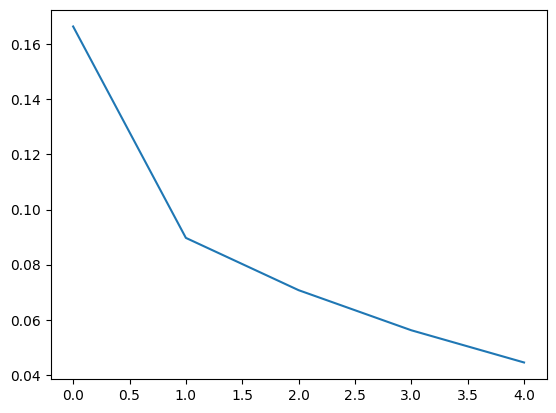

In [40]:
plt.plot(model.history.history["loss"])

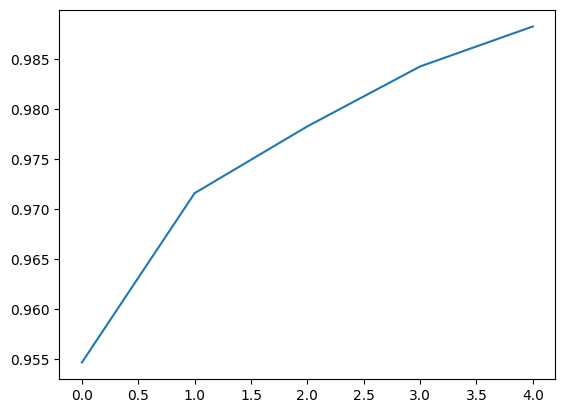

In [41]:
plt.plot(model.history.history["accuracy"])

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Modelin Test Aşaması

In [44]:
from colorama import Fore #yazıları renkli yazmak için kullandıgımız kütüphane fonksiyonu => Fore
def yorum_analiz(model,yorum):
    yorum_token = tokenizer.texts_to_sequences(yorum)
    tokens_pad = pad_sequences(yorum_token,50)
    sonuç = model.predict(tokens_pad)
    if sonuç > 0.9:
        print(Fore.GREEN)
        print(yorum[0], " ==> yorumu son derece olumlu, değeri: ", sonuç)
    elif 0.8 < sonuç <= 0.9:
        print(Fore.GREEN)
        print(yorum[0], " ==> yorumu gayet olumlu, değeri: ", sonuç)
    elif 0.7 < sonuç <= 0.8:
        print(Fore.BLUE)
        print(yorum[0], " ==> yorumu olumluya yakın, değeri: ", sonuç)
    elif 0.6 < sonuç <= 0.7:
        print(Fore.BLACK)
        print(yorum[0], " ==> yorumu kararsız, değeri: ", sonuç)
    elif 0.5 < sonuç <= 0.6:
        print(Fore.BLACK)
        print(yorum[0], " ==> yorumu nötrdür, değeri: ", sonuç)
    elif 0.4 < sonuç <= 0.5:
        print(Fore.RED)
        print(yorum[0], " ==> yorumu olumsuza yakın, değeri: ", sonuç)
    elif 0.3 < sonuç <= 0.4:
        print(yorum[0], " ==> yorumu oldukça olumsuz, değeri: ", sonuç)
    else:
        print(Fore.RED)
        print(yorum[0], " ==> yorumu aşırı olumsuz, değeri: ", sonuç)

<br><br><br><br><br><br><br><br><br><br><br><br><br>

In [45]:
yorum = [
    ["fiyat performans bir ürün gerçekden begendim"],
    ["kalitesiz bir üründü malesef"],
    ["Bu ürün gerçekten harika, kesinlikle tavsiye ederim"],
    ["Fiyatına göre çok iyi bir performans, memnun kaldım"],
    ["Hızlı teslimat ve mükemmel kalite, teşekkürler"],
    ["Beklentilerimi fazlasıyla karşıladı, tekrar alırım"],
    ["Kullanımı çok rahat, herkesin denemesini öneririm"],
    ["Ürün beklediğim gibi değildi, iade ettim"],
    ["Ürünün kalitesi gerçekten düşük, hayal kırıklığına uğradım"],
    ["Müşteri hizmetleri çok yardımcı oldu, üründen memnun kaldım"],
    ["Ürün açıklamalarda anlatıldığı gibi değildi, hayal kırıklığı yaşadım"],
    ["Hızlı kargo ve güzel paketleme, teşekkürler"],
    ["Ürünü beğenmedim, çok kalitesiz"],
    ["Ürün fiyatına göre oldukça iyi, tavsiye ederim"],
    ["Maalesef ürün beklediğim kalitede değil"],
    ["Malzeme kalitesi çok düşük, tavsiye etmiyorum"],
    ["Ürün çok çabuk bozuldu, memnun kalmadım"],
    ["Paketleme çok kötüydü, ürün hasar görmüş"],
    ["Parasına değmez, beklentimi karşılamadı"],
    ["Renk soldu ve dikişler açıldı, kaliteli değil"],
    ["Beklediğim gibi değil, çok dayanıksız"],
    ["Ürünün fotoğrafları yanıltıcı, hayal kırıklığına uğradım"],
    ["Kargo çok geç geldi, ürün hasar görmüştü"],
    ["Ürün açıklamalara uymuyor, iade etmek zorunda kaldım"]
]
#modeli test etmek amacıyla daha önce görmediği verileri veriyoruz bu aşamada 
for i in yorum:
    print(yorum_analiz(model,i))
#modelin Tahmin ettiği sonuçlar alt kısımda yer alıyor.
#yeşil renkerer olumlu kırmızı renkteki yorumlar modele göre olumsuz metinlerdir

1/1 [==============================] - 0s 25ms/step

fiyat performans bir ürün gerçekden begendim  ==> yorumu son derece olumlu, değeri:  [[0.9971269]]
None
1/1 [==============================] - 0s 25ms/step

kalitesiz bir üründü malesef  ==> yorumu aşırı olumsuz, değeri:  [[0.07484412]]
None
1/1 [==============================] - 0s 25ms/step

Bu ürün gerçekten harika, kesinlikle tavsiye ederim  ==> yorumu son derece olumlu, değeri:  [[0.99722856]]
None
1/1 [==============================] - 0s 26ms/step

Fiyatına göre çok iyi bir performans, memnun kaldım  ==> yorumu son derece olumlu, değeri:  [[0.9971991]]
None
1/1 [==============================] - 0s 26ms/step

Hızlı teslimat ve mükemmel kalite, teşekkürler  ==> yorumu son derece olumlu, değeri:  [[0.99715537]]
None
1/1 [==============================] - 0s 24ms/step

Beklentilerimi fazlasıyla karşıladı, tekrar alırım  ==> yorumu son derece olumlu, değeri:  [[0.9971396]]
None
1/1 [==============================] - 0s 24ms/step

